In [1]:
from feature_extraction import FeatureExtraction
from classifier import ClassifierTraining
from objection_detection import ObjectionDetection
import matplotlib.image as mpimg
import numpy as np
import glob, json
from multiprocessing import Pool
import matplotlib.pyplot as plt
from post_processing import PostProcessing

%load_ext autoreload
%autoreload 2

** Feature Extraction **
- bin spatial 
- color histogram
- hog (histogram of gradient)

** Data **
- available at https://github.com/udacity/CarND-Vehicle-Detection

In [2]:
data_car = glob.glob("./data/vehicles/*/*.png")
data_no_car = glob.glob("./data/non-vehicles/*/*.png")
data = data_car + data_no_car

featureEX = FeatureExtraction()
feature_output = './features_extacted.json'

def feature_ex(image_path):
    img = mpimg.imread(image_path)
    feature = featureEX.run(img)

    result = {}
    result['feature'] = list(feature)
    if 'non-vehicles/' in image_path:
        result['label'] = 0
    else:
        result['label'] = 1
    return result

p = Pool(8)
results = p.map(feature_ex, data)
p.close()

with open(feature_output, 'w') as f:
    for line in results:
        f.write(json.dumps(line))
        f.write("\n")

Car image in hog feature space

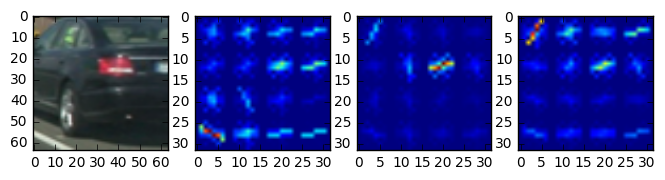

In [3]:
img_car_path = "./samples/image0000.png"
img_car = mpimg.imread(img_car_path)
_, hog_img = FeatureExtraction().get_hog_features(img_car, vis=True)

fig, ax = plt.subplots(1, 4, figsize=(8, 2))
ax[0].imshow(img_car)
ax[1].imshow(hog_img[0])
ax[2].imshow(hog_img[1])
ax[3].imshow(hog_img[2])
plt.show()

Non car in hog feature space

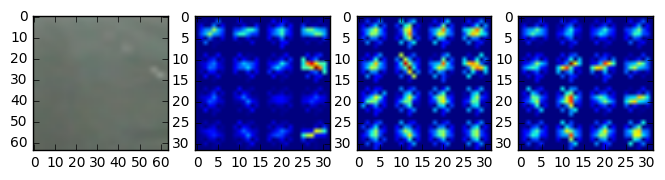

In [4]:
img_non_car_path = "./samples/image1.png"
img_non_car = mpimg.imread(img_non_car_path)
_, hog_img = FeatureExtraction().get_hog_features(img_non_car, vis=True)

fig, ax = plt.subplots(1, 4, figsize=(8, 2))
ax[0].imshow(img_non_car)
ax[1].imshow(hog_img[0])
ax[2].imshow(hog_img[1])
ax[3].imshow(hog_img[2])
plt.show()

** Classifier Training **

In [15]:
model_output = './vehicle_detection_model.pkl'

classiferTrainer = ClassifierTraining(feature_output, model_output)
classiferTrainer.train()

loading feature from file
training classifier
(14208, 4140) (3552, 4140)
train score: 1.0
test  score: 0.983952702703


** Test on single image **

In [16]:
image_path = "./samples/images00410.jpg"
image = mpimg.imread(image_path)

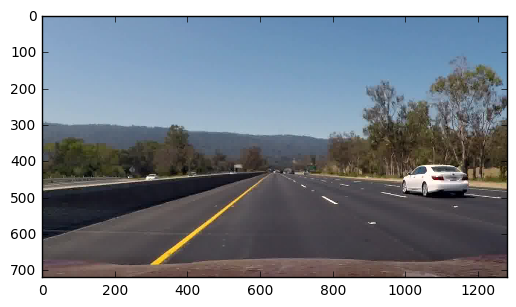

In [17]:
plt.imshow(image)
plt.show()

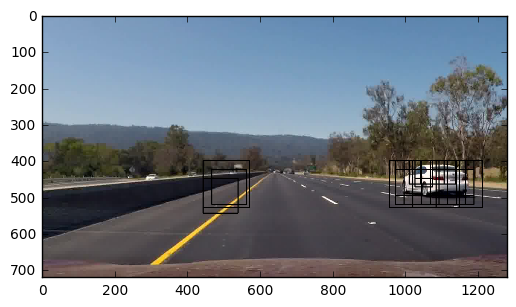

In [20]:
ob_detect = ObjectionDetection(model_output)

window_img2, hot_windows = ob_detect.run(image)
plt.imshow(window_img2)
plt.show()

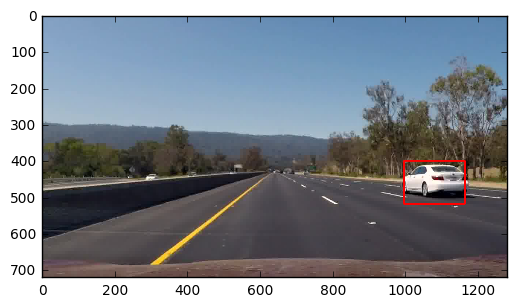

In [21]:
res, cars = PostProcessing().run(image, hot_windows, 3)
plt.imshow(res)
plt.show()

In [24]:
def video_pipeline(img):
    img_copy = img.astype(np.float32) / 255
    window_img2, hot_windows = ob_detect.run(img_copy)

    res, cars = PostProcessing().run(img, hot_windows, 3)
    return res

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

print('Processing video ...')

clip2 = VideoFileClip('./data/project_video.mp4').subclip(42, 45)
vid_clip = clip2.fl_image(video_pipeline)
white_output = './data/processed_vedio_3.mp4'
vid_clip.write_videofile(white_output, audio=False)

Processing video ...
[MoviePy] >>>> Building video ./processed_vedio_3.mp4
[MoviePy] Writing video ./processed_vedio_3.mp4


 99%|█████████▊| 75/76 [01:19<00:01,  1.05s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./processed_vedio_3.mp4 



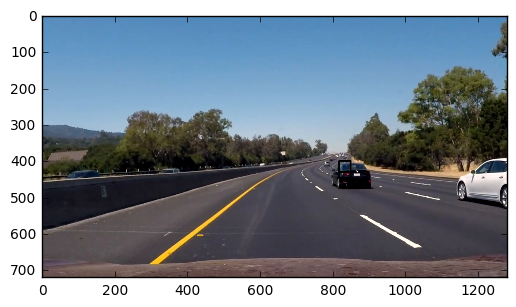

In [25]:
img = clip2.get_frame(10)
processed = video_pipeline(img)
plt.imshow(img)
plt.show()

In [26]:
HTML("""
<video width="480" height="270" controls>
  <source src="{0}">
</video>
""".format(white_output))